In [2]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import os.path as op
import xarray as xr

In [20]:
dir = '/home/INT/brovelli.a/code/acrho/data/spiking_model/project/netw/homog'
fname = op.join(dir, 'data.pkl')
df = pd.read_pickle(fname)

In [26]:
df

,t_spike_exc,index_spike_exc,t_spike_inh,index_spike_inh
0,"[0.043144, 0.049252, 0.06034, 0.063116, 0.0633...","[7, 63, 28, 35, 41, 31, 8, 70, 13, 3, 10, 36, ...","[0.023316, 0.02332, 0.035192, 0.043832, 0.0497...","[87, 90, 86, 87, 92, 85, 88, 87, 81, 80, 93, 8..."
1,"[0.028612, 0.036628, 0.037804, 0.040392, 0.041...","[58, 70, 39, 0, 17, 5, 7, 45, 36, 13, 31, 35, ...","[0.024116, 0.024912, 0.029428, 0.039888, 0.042...","[98, 81, 96, 95, 80, 87, 93, 81, 99, 87, 89, 8..."
2,"[0.02576, 0.0321, 0.032556, 0.033092, 0.035932...","[75, 54, 73, 72, 14, 49, 10, 6, 46, 36, 7, 65,...","[0.022632, 0.029288, 0.035276, 0.03718, 0.0373...","[96, 80, 82, 90, 85, 92, 80, 88, 95, 98, 93, 8..."
3,"[0.023816, 0.027584, 0.028404, 0.02926, 0.0303...","[10, 43, 38, 41, 67, 16, 32, 34, 53, 31, 62, 2...","[0.0265, 0.029168, 0.030632, 0.031412, 0.03418...","[88, 83, 91, 80, 82, 81, 92, 89, 87, 80, 95, 8..."
4,"[0.021208, 0.021932, 0.02314, 0.023392, 0.0238...","[68, 36, 46, 55, 8, 34, 19, 26, 12, 31, 56, 6,...","[0.024256, 0.024748, 0.024928, 0.025292, 0.028...","[82, 86, 80, 98, 90, 97, 93, 92, 91, 80, 90, 8..."
...,...,...,...,...
195,"[0.031844, 0.03254, 0.034408, 0.034912, 0.0352...","[24, 63, 58, 4, 59, 71, 14, 43, 51, 3, 26, 50,...","[0.02264, 0.022744, 0.034072, 0.034188, 0.0375...","[86, 83, 90, 82, 99, 80, 96, 87, 83, 95, 94, 8..."
196,"[0.04864, 0.050488, 0.05286, 0.053428, 0.05377...","[66, 35, 33, 56, 64, 65, 5, 72, 17, 25, 62, 10...","[0.019876, 0.023928, 0.03052, 0.031564, 0.0436...","[95, 81, 83, 80, 84, 81, 89, 91, 90, 80, 94, 8..."
197,"[0.020372, 0.022792, 0.030128, 0.033012, 0.033...","[35, 13, 6, 28, 66, 64, 46, 68, 26, 56, 63, 74...","[0.021164, 0.022908, 0.027588, 0.036404, 0.037...","[89, 99, 80, 86, 91, 94, 83, 80, 92, 88, 85, 9..."
198,"[0.026868, 0.02894, 0.030696, 0.031172, 0.0341...","[73, 25, 39, 75, 45, 44, 63, 20, 29, 23, 35, 7...","[0.025044, 0.031668, 0.032244, 0.036092, 0.038...","[83, 89, 87, 80, 85, 91, 99, 97, 94, 81, 96, 8..."


In [126]:
fr = []
for t in range(len(df)):

    # Spike matrix sparse
    spike_matrix = np.zeros((100, int(1e4)+1))

    # Excitatory neurons
    time_raster_exc = df.at[t, 't_spike_exc']
    # Sample at msec resolution
    time_raster_exc = np.round(time_raster_exc, 3) * 1000
    # Make it an index
    ind_time = time_raster_exc.astype(int)
    ind_neuron = df.at[t, 'index_spike_exc']
    # Make a sparse matrix
    spike_matrix[ind_neuron, ind_time] = 1

    # Inhibitory neurons
    time_raster_inh = df.at[t, 't_spike_inh']
    # Sample at msec resolution
    time_raster_inh = np.round(time_raster_inh, 3) * 1000
    # Make it an index
    ind_time = time_raster_inh.astype(int)
    ind_neuron = df.at[t, 'index_spike_inh']
    # Make a sparse matrix and append to spike_matrix
    spike_matrix[ind_neuron, ind_time] = 1

    # Convolving with a boxcar filter
    from scipy.ndimage import convolve1d
    sigma = 10
    fr_trial = convolve1d(spike_matrix, np.ones(sigma), axis=1)

    # Binarise firing rate and fill with 0s and 1s
    fr_trial[fr_trial > 0] = 1

    # from scipy.ndimage import gaussian_filter1d
    # sigma = 30
    # fr_trial = gaussian_filter1d(spike_matrix, sigma, axis=1)

    # Append fr_trial to fr
    fr.append(fr_trial)

# make is DataArray
fr = xr.DataArray(fr, dims=['trials', 'neurons', 'times'])
# add attributes and coordinates
fr.attrs['units'] = 'Hz'
fr.attrs['description'] = 'Firing probability'
fr.coords['trials'] = np.arange(200)
fr.coords['neurons'] = np.arange(100)
fr.coords['times'] = np.arange(10001)



In [123]:
fr

<xarray.DataArray (trials: 200, neurons: 100, times: 10001)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 1., 1.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])
Coordinates:
  * trials   (trials) int64 0 1 2 3 4 5 6 7 ... 192 193 194 195 196 197 198 199
  * neurons  (neurons) int64 0 1 2 3 4 5 6 7 8 9 ... 91 92 93 94 95 96 97 98 99
  * times    (times) int64 0 1 2 3 4 5 6 ... 9994 9995 9996 9997 9998 9999 10000
Attributes:
    units:        Hz
    description:  Firing rate

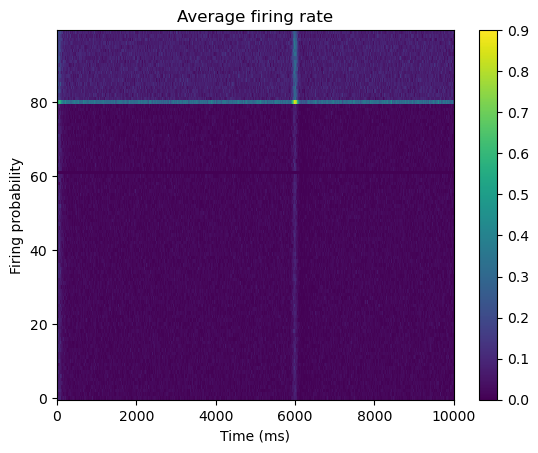

In [28]:


# Compute single-trial firing rate
for n in range(len(df)):

    time_raster_exc = df.at[n, 't_spike_exc']
    exc_spike= df.at[n, 'index_spike_exc']


    time_raster_inh= df.at[n, 't_spike_inh']
    inh_spike= df.at[n, 'index_spike_inh']



In [30]:
# Create a 2D matrix binary matrix with 1 when a spike occurs
exc_raster = np.zeros((len(exc_spike), len(time_raster_exc)))
for i in range(len(exc_spike)):
    exc_raster[i, exc_spike[i]] = 1

inh_raster = np.zeros((len(inh_spike), len(time_raster_inh)))
for i in range(len(inh_spike)):
    inh_raster[i, inh_spike[i]] = 1

exc_firing_rate = np.sum(exc_raster, axis=0)/len(exc_spike)
inh_firing_rate = np.sum(inh_raster, axis=0)/len(inh_spike)

df.at[n, 'exc_firing_rate'] = exc_firing_rate
df.at[n, 'inh_firing_rate'] = inh_firing_rate


ValueError: setting an array element with a sequence.

In [4]:
time_raster_exc = df.at[100, 't_spike_exc']
exc_spike= df.at[100, 'index_spike_exc']
time_raster_inh= df.at[100, 't_spike_inh']
inh_spike= df.at[100, 'index_spike_inh']

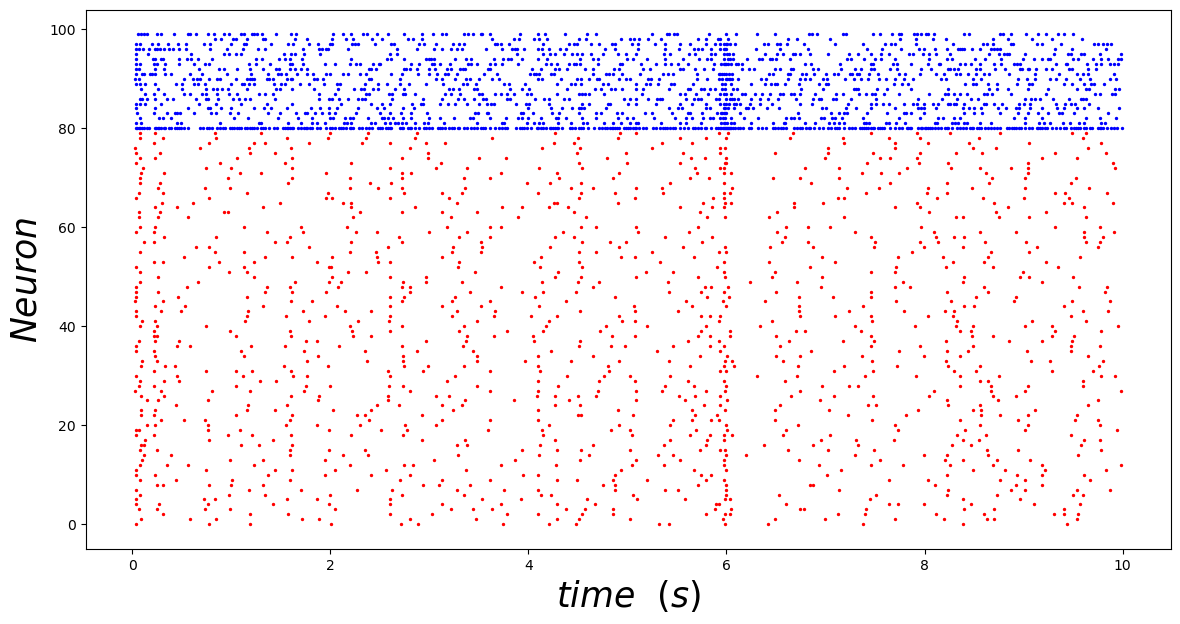

In [7]:
FIG=  []
fig=plt.figure(figsize=(14,7))
plt.scatter(time_raster_exc,exc_spike, s=2,color='red')
plt.scatter(time_raster_inh,inh_spike, s=2,color='blue')


plt.xlabel(r"$time \ \ (s) $",fontsize=25)
plt.ylabel(r"$Neuron \ \ $",fontsize=25)
plt.show()